# Quantifying Shade Inclusivity in Global Beauty Brands

This project analyzes foundation shade offerings across global beauty brands to evaluate how inclusive different brands are in serving diverse skin tones.

Using exploratory data analysis and a custom Shade Inclusivity Index (SII), we compare shade coverage and distribution across brands and regions.

Goals:
- Compare shade coverage across markets
- Identify biases toward lighter or darker tones
- Build a quantitative inclusivity score

Key findings:

- Shade inclusivity varies significantly across markets, with some brand groups providing broader and more balanced coverage of skin tones than others.
- Brands founded by BIPOC entrepreneurs and several US best sellers provide the strongest overall shade inclusivity, combining wide coverage with stronger representation of darker tones.
- Some markets still concentrate offerings in lighter shade ranges, suggesting gaps in product availability for darker complexions.
- Inclusivity is not determined solely by the number of shades offered; balanced distribution across the full spectrum is equally important.

Overall, this analysis demonstrates how data science can be used to evaluate product inclusivity and identify opportunities for more equitable product design.


## Imports and Setup

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = "whitegrid")


## Data


The dataset contains foundation shade offerings collected from leading beauty brands across multiple global markets. Each shade is represented using hex color values and converted to lightness values using the CIE Lab color model.

Brands are grouped into market categories such as US best sellers, regional best sellers, and brands recommended for diverse skin tones.


In [57]:
#load the data
df = pd.read_csv("data/shades.csv")
df.head()

,brand,brand_short,product,product_short,hex,H,S,V,L,group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2


### Inspecting the Structure

In [58]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          625 non-null    object 
 1   brand_short    625 non-null    object 
 2   product        625 non-null    object 
 3   product_short  625 non-null    object 
 4   hex            625 non-null    object 
 5   H              613 non-null    float64
 6   S              613 non-null    float64
 7   V              613 non-null    float64
 8   L              625 non-null    int64  
 9   group          625 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 49.0+ KB


,H,S,V,L,group
count,613.000000,613.000000,613.000000,625.000000,625.000000
mean,25.314845,0.459494,0.779543,65.920000,3.472000
std,5.327852,0.154089,0.173955,17.512267,1.976529
min,4.000000,0.100000,0.200000,11.000000,0.000000
25%,23.000000,0.350000,0.690000,55.000000,2.000000
50%,26.000000,0.440000,0.840000,71.000000,3.000000
75%,29.000000,0.560000,0.910000,79.000000,5.000000
max,45.000000,1.000000,1.000000,95.000000,7.000000


### Data Cleaning & Preparation

Mapping the Group Labels:

The dataset categorizes brands using numeric group labels.  
For readability and analysis, these group codes are mapped to descriptive group names representing brand origin or market category.

In [59]:
group_map = {
    0: "Fenty",
    1: "Make Up For Ever",
    2: "US Best Sellers",
    3: "BIPOC Founders",
    4: "BIPOC Recommended",
    5: "Nigeria Best Sellers",
    6: "Japan Best Sellers",
    7: "India Best Sellers"
}

df["group_name"] = df["group"].map(group_map)


## Exploratory Analysis: Shade Coverage


### Shade Distribution

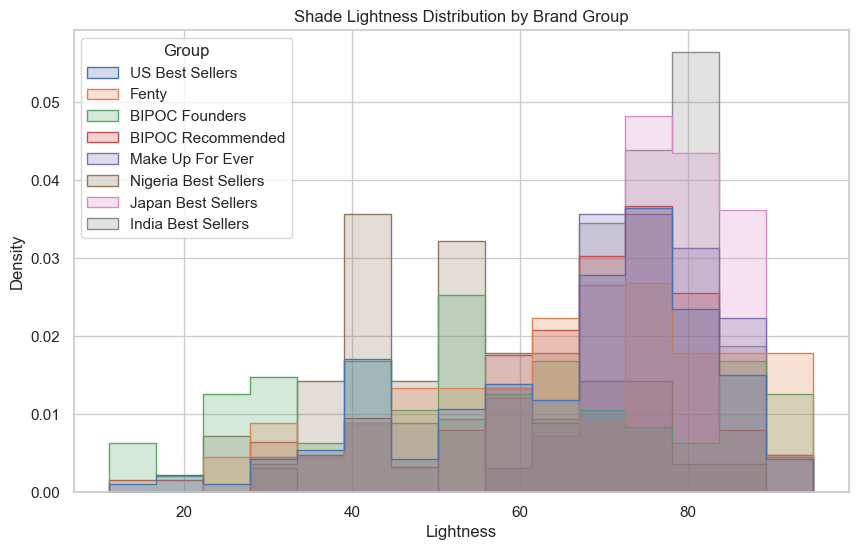

In [60]:
plt.figure(figsize=(10,6))
ax = sns.histplot(
    data = df,
    x = "L",
    hue = "group_name",
    element = "step",
    stat = "density",
    common_norm = False
)
ax.legend_.set_title("Group")
plt.title("Shade Lightness Distribution by Brand Group")
plt.ylabel("Density")
plt.xlabel('Lightness')
plt.show()


#### Observations
This distribution shows how foundation shades are spread across the lightness spectrum for each brand group.

Several patterns emerge:

- Japanese best sellers show a strong concentration in higher lightness values, indicating offerings skew toward lighter complexions.
- Nigerian best sellers exhibit broader coverage in darker lightness ranges, suggesting better representation of darker skin tones compared to many other markets.
- US best sellers and Make Up For Ever provide wider coverage overall but still concentrate many shades in mid-to-light ranges.
- Fenty displays relatively balanced coverage across mid and darker tones, consistent with its reputation for inclusivity.
- BIPOC-founded and BIPOC-recommended brands tend to extend further into darker shades than many mainstream best sellers, although distributions still show clustering in certain ranges.

Overall, shade offerings across markets are uneven, with many brands concentrating offerings in lighter or mid-tone shades rather than evenly covering the full spectrum.

### Shade Range Coverage

In [61]:
range_df = (
    df.groupby("group_name")["L"]
    .agg(["min", "max"])
    .reset_index()
)

range_df["range"] = range_df["max"] - range_df["min"]
range_df.sort_values("range", ascending=False)


,group_name,min,max,range
0,BIPOC Founders,11,94,83
1,BIPOC Recommended,14,95,81
7,US Best Sellers,16,92,76
2,Fenty,25,94,69
6,Nigeria Best Sellers,23,87,64
5,Make Up For Ever,31,92,61
3,India Best Sellers,29,87,58
4,Japan Best Sellers,58,90,32


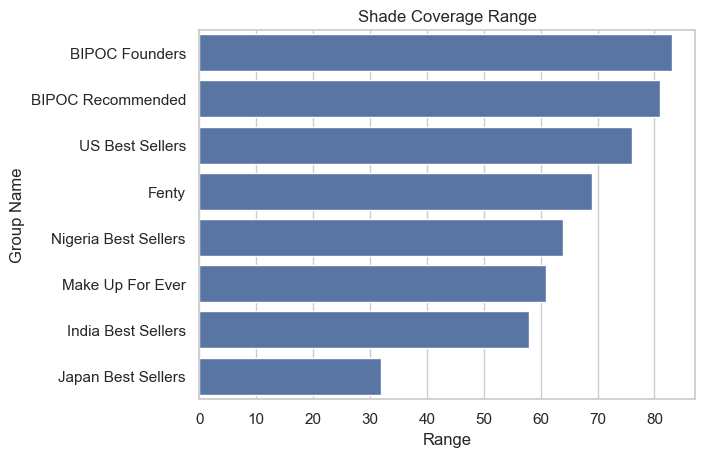

In [62]:
range_df = range_df.sort_values("range", ascending=False)
sns.barplot(data = range_df, x = "range", y = "group_name")
plt.title("Shade Coverage Range")
plt.ylabel("Group Name")
plt.xlabel('Range')
plt.show()


#### Observations:

Shade coverage range measures how much of the lightness spectrum each group spans between its lightest and darkest shades.

Several differences stand out:

- BIPOC-founded and BIPOC-recommended brands provide the widest overall coverage, suggesting intentional efforts to serve a broader range of skin tones.
- US best sellers and Fenty also show strong coverage, indicating mainstream markets have expanded shade ranges in recent years.
- Nigeria and India best sellers show moderate coverage, suggesting some inclusivity but still narrower offerings compared to leading groups.
- Japanese best sellers have the narrowest coverage range, with shades concentrated in lighter regions of the spectrum.

This shows that while some markets now provide broad shade coverage, others still offer limited variation, potentially leaving customers with darker or very light complexions underserved.

However, range alone does not guarantee inclusivity as shades may still cluster around certain tones. Therefore, we next examine whether shade offerings are evenly distributed or biased toward certain parts of the spectrum.


### Average Shade Bias

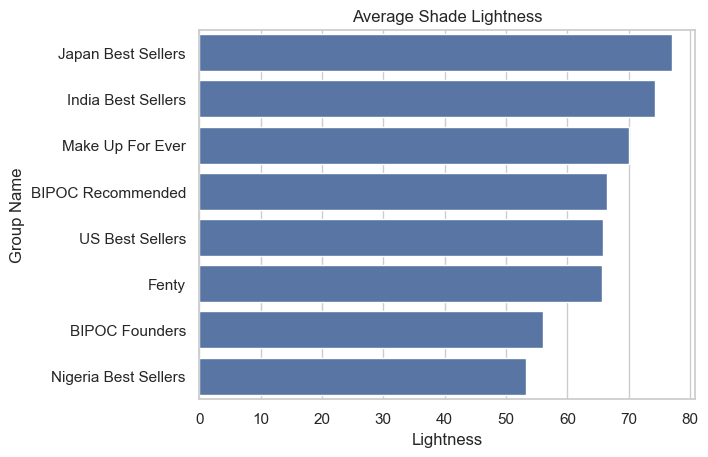

In [63]:
mean_lightness = (
    df.groupby("group_name")["L"]
    .mean()
    .reset_index()
)
mean_lightness = mean_lightness.sort_values("L", ascending = False)
sns.barplot(data = mean_lightness, x = "L", y = "group_name")
plt.title("Average Shade Lightness")
plt.ylabel("Group Name")
plt.xlabel('Lightness')
plt.show()


#### Observations:

Average shade lightness provides insight into whether a brand’s shade offerings skew toward lighter or darker tones overall.

Higher average values indicate that shades are concentrated toward lighter complexions, while lower averages suggest stronger representation of darker tones.

Key observations include:

- Japanese and Indian best sellers show the highest average lightness values, indicating offerings are concentrated toward lighter shades.
- Make Up For Ever and US best sellers also lean toward lighter tones, though they provide broader coverage ranges overall.
- Nigerian best sellers and BIPOC-founded brands have noticeably lower average lightness, suggesting better representation of darker complexions.
- Fenty and BIPOC-recommended brands sit closer to the middle, showing more balanced shade offerings compared to many mainstream groups.

This highlights an important distinction: even brands with large shade ranges may still center their offerings around lighter tones, meaning true inclusivity requires both broad coverage and balanced distribution.


## Building Inclusivity Metrics

### Metric 1: Shade Coverage Range

In [64]:
coverage_range = df.groupby("group_name")["L"].agg(
    lambda x: x.max() - x.min()
)


### Metric 2: Distribution Evenness

In [65]:
def evenness(x):
    hist, _ = np.histogram(x, bins=10)
    hist = hist / hist.sum()
    return -np.sum(hist * np.log(hist + 1e-9))

evenness_score = df.groupby("group_name")["L"].apply(evenness)


### Metric 3: Dark Shade Coverage

In [66]:
dark_threshold = df["L"].quantile(0.3)

dark_coverage = (
    df[df["L"] <= dark_threshold]
    .groupby("group_name")
    .size()
)


### Inclusivity Index

In [67]:
metrics = pd.DataFrame({
    "range": coverage_range,
    "evenness": evenness_score,
    "dark_coverage": dark_coverage
}).fillna(0)

metrics_norm = (metrics - metrics.min()) / (metrics.max() - metrics.min())
metrics_norm["inclusivity_index"] = metrics_norm.mean(axis = 1)
metrics_norm = metrics_norm.sort_values("inclusivity_index", ascending = False)



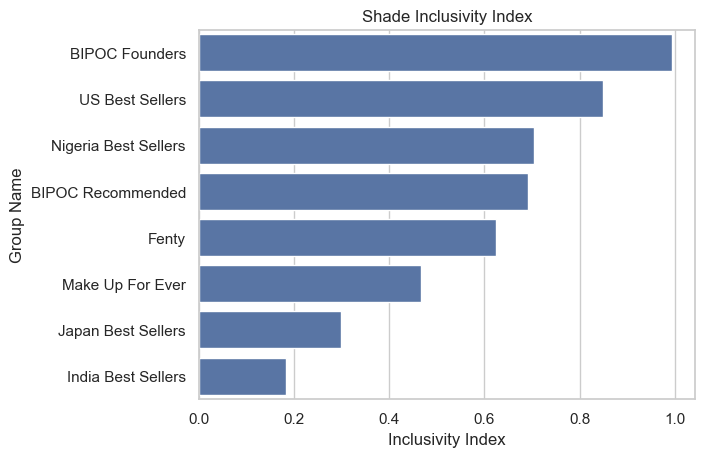

In [68]:
sns.barplot(
    data = metrics_norm.reset_index(),
    x = "inclusivity_index",
    y = "group_name"
)
plt.title("Shade Inclusivity Index")
plt.ylabel('Group Name')
plt.xlabel('Inclusivity Index')
plt.show()


#### Observations: 

The Shade Inclusivity Index summarizes how effectively each group serves diverse skin tones by combining shade range, distribution balance, and darker shade representation.

Several important patterns emerge:

- Brands founded by BIPOC entrepreneurs achieve the highest inclusivity scores, reflecting strong coverage across the full lightness spectrum and balanced shade distribution.
- US best sellers and Nigerian best sellers also perform well, indicating that mainstream markets are increasingly improving shade representation.
- BIPOC-recommended brands and Fenty fall in the middle range, offering relatively strong coverage but with some concentration in mid-tone ranges rather than fully balanced distributions.
- Make Up For Ever shows moderate performance, with reasonable distribution but less representation in darker tones compared to higher-ranked groups.
- Japanese and Indian best sellers rank lowest overall, largely due to narrower shade ranges or uneven distribution across tones.

A key takeaway is that inclusivity depends not only on the number of shades offered but also on how evenly those shades are distributed across skin tones. Brands can improve inclusivity by addressing gaps in underrepresented shade regions rather than simply increasing total shade counts.


## Key Insights

The analysis highlights several important patterns in how beauty brands serve diverse skin tones:

- Shade inclusivity varies widely across brand groups, indicating that product availability still differs significantly by region and brand positioning.
- Broad shade range alone does not guarantee inclusivity. Some brands offer many shades but still concentrate offerings in lighter or mid-tone regions.
- Brands founded by BIPOC entrepreneurs provide the strongest overall coverage and balance across skin tones, suggesting intentional product development aimed at underserved consumers.
- Mainstream US brands show improving darker shade representation, reflecting growing market awareness and competitive pressure toward inclusivity.
- Certain markets still show limited darker shade availability, indicating potential opportunities for brands to expand offerings and better serve local customer populations.

Overall, the results demonstrate that measuring shade inclusivity requires evaluating coverage range, distribution balance, and representation across tones rather than simply counting the number of shades offered.


## Product & Business Applications

The findings from this analysis have several implications for product strategy and business decision-making in the beauty industry.

- Shade expansion strategies should focus on filling underrepresented tone ranges rather than simply increasing total shade counts, leading to more meaningful inclusivity improvements.
- Brands entering new geographic markets can use data-driven analysis to identify shade gaps relative to local customer demographics and tailor product offerings accordingly.
- Inclusivity metrics can support product planning decisions by quantifying how well shade offerings serve diverse customer bases, enabling teams to track improvement over time.
- Companies that invest in inclusive product development may capture underserved customer segments, strengthen brand loyalty, and improve customer satisfaction in competitive markets.
- Retailers and e-commerce platforms could use similar metrics to guide product assortment decisions, ensuring more equitable representation across skin tones.

Overall, this analysis illustrates how data science can inform more inclusive product design and support strategic decisions that better align product offerings with diverse consumer needs.


## Conclusion & Future Work

This project demonstrates how data science techniques can be used to quantitatively evaluate inclusivity in consumer product offerings. By analyzing foundation shade distributions across global beauty brands, we showed that inclusivity varies significantly across markets and brand groups.

The results highlight that offering many shades alone does not guarantee inclusivity. True coverage depends on both the range of shades provided and how evenly those shades represent the full spectrum of skin tones. The Shade Inclusivity Index developed in this analysis provides a framework for comparing brands and identifying where gaps remain.

Future work could extend this analysis in several ways:

- Compare shade offerings against real-world population skin tone distributions to measure alignment between products and customer demographics.
- Incorporate product sales or customer demand data to evaluate whether inclusive shade offerings influence market performance.
- Extend analysis beyond foundations to include concealers, powders, and other complexion products.
- Track how shade inclusivity evolves over time as brands expand product lines.
- Develop interactive dashboards or recommendation tools to help brands identify shade gaps in specific markets.

Overall, this work highlights how data-driven analysis can help companies design more inclusive products while uncovering opportunities to better serve diverse customer populations.
